In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.12.0


In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
## Prints the categorical columns
for i in df.columns:
    if df[i].nunique() <= 10:
        print(i)

Geography
Gender
NumOfProducts
HasCrCard
IsActiveMember
Exited


In [8]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [9]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [10]:
gender = pd.get_dummies(df.Gender, drop_first=True)
geography = pd.get_dummies(df.Geography, drop_first=True)

In [11]:
X.drop(['Geography','Gender'], axis =1, inplace=True)

In [12]:
X = pd.concat((X,geography,gender),axis=1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from tensorflow.keras.activations import elu,relu,sigmoid
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [16]:
classifier = Sequential()

In [17]:
#Adding input layer
classifier.add(Dense(units=11, activation=relu))

In [18]:
#Adding hidden layer 1
classifier.add(Dense(units=7, activation=relu))

In [19]:
#Adding hidden layer 2
classifier.add(Dense(units=6, activation=relu))
classifier.add(Dropout(0.2)) #makes 20% neurons as dead neurons

In [20]:
#Adding output layer
classifier.add(Dense(units=1, activation=sigmoid))

In [21]:
classifier.compile(optimizer='adam',metrics=['accuracy'], loss='binary_crossentropy')

In [22]:
#Without early stopping
#model = classifier.fit(x_train,y_train,validation_split=0.30,epochs=100)

In [23]:
early_stopping = EarlyStopping(monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False)

In [24]:
#With early stopping
model = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 0.5795 - accuracy: 0.7343 - val_loss: 0.4832 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4711 - accuracy: 0.7953 - val_loss: 0.4501 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4438 - accuracy: 0.7962 - val_loss: 0.4351 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.7962 - val_loss: 0.4276 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4202 - accuracy: 0.7960 - val_loss: 0.4197 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4161 - accuracy: 0.7962 - val_loss: 0.4088 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4017 - accuracy: 0.7962 - val_loss: 0.4025 - val_accuracy:

In [25]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

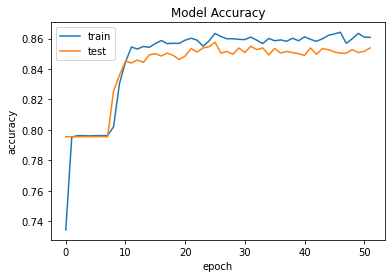

In [26]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

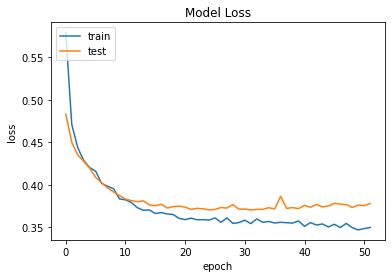

In [27]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

In [28]:
y_pred = classifier.predict(x_test)
y_pred = y_pred >= 0.5

63/63 [==============================] - 0s 742us/step


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
cm,score

(array([[1501,   94],
        [ 187,  218]], dtype=int64),
 0.8595)